In [1]:
!pip install transformers datasets torch torchvision torchaudio accelerate
!pip install scikit-learn matplotlib seaborn
!pip install psutil gpustat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 32.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 16.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found existing

In [2]:
# Step 2: Load SST-2 Dataset
from datasets import load_dataset
import pandas as pd

# Load the SST-2 dataset
dataset = load_dataset("glue", "sst2")

# Display dataset structure and sample data
print("Dataset structure:")
print(dataset)
print("\nDataset sizes:")
print(f"Train: {len(dataset['train'])}")
print(f"Validation: {len(dataset['validation'])}")
print(f"Test: {len(dataset['test'])}")

print("\nSample from training set:")
for i in range(3):
    print(f"Text: {dataset['train'][i]['sentence']}")
    print(f"Label: {dataset['train'][i]['label']} ({'positive' if dataset['train'][i]['label'] == 1 else 'negative'})")
    print("-" * 50)

# Check label distribution
train_labels = [example['label'] for example in dataset['train']]
print(f"\nLabel distribution in training set:")
print(f"Negative (0): {train_labels.count(0)}")
print(f"Positive (1): {train_labels.count(1)}")
print(f"Balance ratio: {train_labels.count(1) / len(train_labels):.2%} positive")

README.md:   0%|          | 0.00/35.3k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/3.11M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/72.8k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/148k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/67349 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

Dataset structure:
DatasetDict({
    train: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 67349
    })
    validation: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 872
    })
    test: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 1821
    })
})

Dataset sizes:
Train: 67349
Validation: 872
Test: 1821

Sample from training set:
Text: hide new secretions from the parental units 
Label: 0 (negative)
--------------------------------------------------
Text: contains no wit , only labored gags 
Label: 0 (negative)
--------------------------------------------------
Text: that loves its characters and communicates something rather beautiful about human nature 
Label: 1 (positive)
--------------------------------------------------

Label distribution in training set:
Negative (0): 29780
Positive (1): 37569
Balance ratio: 55.78% positive


In [3]:
# Step 3: Tokenize using BERT tokenizer
from transformers import AutoTokenizer
import torch

# Initialize BERT tokenizer
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Tokenization function
def tokenize_function(examples):
    return tokenizer(
        examples['sentence'], 
        truncation=True, 
        padding=True, 
        max_length=128,  # Reasonable max length for SST-2
        return_tensors=None  # Return lists, not tensors yet
    )

# Apply tokenization to all splits
print("Tokenizing datasets...")
tokenized_datasets = dataset.map(tokenize_function, batched=True)

# Check tokenized data structure
print("Tokenized dataset structure:")
print(tokenized_datasets)

# Sample tokenized example
print("\nSample tokenized example:")
example = tokenized_datasets['train'][0]
print(f"Original text: {dataset['train'][0]['sentence']}")
print(f"Input IDs length: {len(example['input_ids'])}")
print(f"Input IDs: {example['input_ids'][:20]}...")  # Show first 20 tokens
print(f"Attention mask: {example['attention_mask'][:20]}...")
print(f"Label: {example['label']}")

# Check sequence lengths distribution
train_lengths = [len(example['input_ids']) for example in tokenized_datasets['train']]
print(f"\nSequence length statistics:")
print(f"Min length: {min(train_lengths)}")
print(f"Max length: {max(train_lengths)}")
print(f"Average length: {sum(train_lengths)/len(train_lengths):.1f}")
print(f"Sequences at max length (128): {train_lengths.count(128)}")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Tokenizing datasets...


Map:   0%|          | 0/67349 [00:00<?, ? examples/s]

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Map:   0%|          | 0/1821 [00:00<?, ? examples/s]

Tokenized dataset structure:
DatasetDict({
    train: Dataset({
        features: ['sentence', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 67349
    })
    validation: Dataset({
        features: ['sentence', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 872
    })
    test: Dataset({
        features: ['sentence', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1821
    })
})

Sample tokenized example:
Original text: hide new secretions from the parental units 
Input IDs length: 56
Input IDs: [101, 5342, 2047, 3595, 8496, 2013, 1996, 18643, 3197, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...
Attention mask: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...
Label: 0

Sequence length statistics:
Min length: 50
Max length: 66
Average length: 57.1
Sequences at max length (128): 0


In [4]:
# Step 4: Create Dataset & DataLoader (Fixed)
from torch.utils.data import DataLoader
from transformers import DataCollatorWithPadding
import torch

# Create data collator for dynamic padding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# Set format to PyTorch tensors and select relevant columns
tokenized_datasets.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])

# Create data loaders with proper collation
batch_size = 16  # Reasonable batch size for T4 GPUs
train_dataloader = DataLoader(
    tokenized_datasets['train'], 
    shuffle=True, 
    batch_size=batch_size,
    collate_fn=data_collator
)

eval_dataloader = DataLoader(
    tokenized_datasets['validation'], 
    batch_size=batch_size,
    collate_fn=data_collator
)

test_dataloader = DataLoader(
    tokenized_datasets['test'], 
    batch_size=batch_size,
    collate_fn=data_collator
)

# Display dataloader info
print(f"DataLoaders created:")
print(f"Training batches: {len(train_dataloader)}")
print(f"Validation batches: {len(eval_dataloader)}")
print(f"Test batches: {len(test_dataloader)}")
print(f"Batch size: {batch_size}")

# Test a batch to verify data format
print("\nSample batch verification:")
sample_batch = next(iter(train_dataloader))
print(f"Input IDs shape: {sample_batch['input_ids'].shape}")
print(f"Attention mask shape: {sample_batch['attention_mask'].shape}")
print(f"Labels shape: {sample_batch['labels'].shape}")  # Note: 'labels' not 'label'
print(f"Labels dtype: {sample_batch['labels'].dtype}")

# Check device availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"\nDevice available: {device}")
if torch.cuda.is_available():
    print(f"GPU count: {torch.cuda.device_count()}")
    for i in range(torch.cuda.device_count()):
        print(f"GPU {i}: {torch.cuda.get_device_name(i)}")
        print(f"GPU {i} memory: {torch.cuda.get_device_properties(i).total_memory / 1024**3:.1f} GB")

2025-06-24 12:40:14.519265: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750768814.688561      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750768814.735179      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


DataLoaders created:
Training batches: 4210
Validation batches: 55
Test batches: 114
Batch size: 16

Sample batch verification:
Input IDs shape: torch.Size([16, 66])
Attention mask shape: torch.Size([16, 66])
Labels shape: torch.Size([16])
Labels dtype: torch.int64

Device available: cuda
GPU count: 2
GPU 0: Tesla T4
GPU 0 memory: 14.7 GB
GPU 1: Tesla T4
GPU 1 memory: 14.7 GB


In [5]:
# Step 5: Define model (BertForSequenceClassification)
from transformers import AutoModelForSequenceClassification
import torch.nn as nn

# Load pre-trained BERT model for sequence classification
model_name = "bert-base-uncased"
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=2,  # Binary classification (positive/negative)
    id2label={0: "negative", 1: "positive"},
    label2id={"negative": 0, "positive": 1}
)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Display model information
print(f"Model loaded: {model_name}")
print(f"Model device: {next(model.parameters()).device}")
print(f"Number of labels: {model.num_labels}")
print(f"Model configuration:")
print(f"  - Hidden size: {model.config.hidden_size}")
print(f"  - Number of attention heads: {model.config.num_attention_heads}")
print(f"  - Number of layers: {model.config.num_hidden_layers}")
print(f"  - Vocabulary size: {model.config.vocab_size}")

# Count total parameters
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"\nModel parameters:")
print(f"  - Total parameters: {total_params:,}")
print(f"  - Trainable parameters: {trainable_params:,}")

# Test forward pass with sample batch
print(f"\nTesting forward pass...")
model.eval()
with torch.no_grad():
    sample_batch = {k: v.to(device) for k, v in sample_batch.items()}
    outputs = model(**sample_batch)
    print(f"Forward pass successful!")
    print(f"Loss: {outputs.loss.item():.4f}")
    print(f"Logits shape: {outputs.logits.shape}")
    print(f"Predictions: {torch.argmax(outputs.logits, dim=-1)}")

# Reset model to training mode
model.train()

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model loaded: bert-base-uncased
Model device: cuda:0
Number of labels: 2
Model configuration:
  - Hidden size: 768
  - Number of attention heads: 12
  - Number of layers: 12
  - Vocabulary size: 30522

Model parameters:
  - Total parameters: 109,483,778
  - Trainable parameters: 109,483,778

Testing forward pass...
Forward pass successful!
Loss: 0.7771
Logits shape: torch.Size([16, 2])
Predictions: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [7]:
# Step 6: Set optimizer to AdaFactor and scheduler with warmup
from transformers import get_linear_schedule_with_warmup
from transformers import Adafactor
import math

# Training hyperparameters
learning_rate = 2e-5  # Standard learning rate for BERT fine-tuning
num_epochs = 2  # 2 epochs for faster training
warmup_ratio = 0.1  # 10% of training steps for warmup

# Calculate total training steps
num_training_steps = len(train_dataloader) * num_epochs
num_warmup_steps = int(num_training_steps * warmup_ratio)

print(f"Training configuration:")
print(f"  - Learning rate: {learning_rate}")
print(f"  - Number of epochs: {num_epochs}")
print(f"  - Total training steps: {num_training_steps}")
print(f"  - Warmup steps: {num_warmup_steps}")
print(f"  - Warmup ratio: {warmup_ratio}")

# Initialize AdaFactor optimizer
optimizer = Adafactor(
    model.parameters(),
    lr=learning_rate,
    clip_threshold=1.0,
    decay_rate=-0.8,
    beta1=None,
    weight_decay=0.01,
    scale_parameter=True,
    relative_step=False
)

# Initialize learning rate scheduler with warmup
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=num_warmup_steps,
    num_training_steps=num_training_steps
)

print(f"\nOptimizer and scheduler initialized:")
print(f"  - Optimizer: Adafactor")
print(f"  - Weight decay: 0.01")
print(f"  - Scheduler: Linear with warmup")
print(f"  - Initial learning rate: {optimizer.param_groups[0]['lr']}")

# Test scheduler behavior
print(f"\nScheduler test (first few steps):")
for step in range(min(5, num_warmup_steps)):
    lr = scheduler.get_last_lr()[0] if hasattr(scheduler, 'get_last_lr') else learning_rate
    print(f"  Step {step}: LR = {lr:.2e}")
    if step < 4:  # Don't actually step on last iteration
        scheduler.step()

# Reset scheduler for actual training
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=num_warmup_steps,
    num_training_steps=num_training_steps
)

Training configuration:
  - Learning rate: 2e-05
  - Number of epochs: 2
  - Total training steps: 8420
  - Warmup steps: 842
  - Warmup ratio: 0.1

Optimizer and scheduler initialized:
  - Optimizer: Adafactor
  - Weight decay: 0.01
  - Scheduler: Linear with warmup
  - Initial learning rate: 0.0

Scheduler test (first few steps):
  Step 0: LR = 0.00e+00
  Step 1: LR = 2.38e-08
  Step 2: LR = 4.75e-08
  Step 3: LR = 7.13e-08
  Step 4: LR = 9.50e-08



# An epoch in machine learning (especially deep learning) means:
One full pass through the entire training dataset by the model.
# Why is it important?
During training, the model learns by adjusting its weights to minimize loss.But adjusting weights after only one pass (1 epoch) is usually not enough.So we repeat the training process over multiple epochs to help the model learn better patterns.

**More epochs = better learning… up to a point**

**Too many epochs = risk of overfitting (model memorizes training data, performs poorly on unseen data)**


In [8]:
# Step 7: Training loop with enhanced visualization
import time
from sklearn.metrics import accuracy_score
import numpy as np

def create_progress_bar(current, total, bar_length=30):
    """Create a visual progress bar"""
    progress = current / total
    filled_length = int(bar_length * progress)
    bar = '█' * filled_length + '░' * (bar_length - filled_length)
    percent = progress * 100
    return f'[{bar}] {percent:.1f}%'

# Initialize tracking variables
training_stats = []
start_time = time.time()

print("🚀 Starting BERT Fine-tuning...")
print("=" * 60)

# Training loop
for epoch in range(num_epochs):
    epoch_start_time = time.time()
    print(f'\n📚 Epoch {epoch + 1}/{num_epochs}')
    print('-' * 40)
    
    # Training phase
    model.train()
    total_train_loss = 0
    total_train_acc = 0
    
    print("🔥 Training Phase:")
    for step, batch in enumerate(train_dataloader):
        # Move batch to GPU
        batch = {k: v.to(device) for k, v in batch.items()}
        
        # Clear gradients
        model.zero_grad()
        
        # Forward pass
        outputs = model(**batch)
        loss = outputs.loss
        logits = outputs.logits
        
        # Calculate accuracy
        predictions = torch.argmax(logits, dim=-1)
        accuracy = (predictions == batch['labels']).float().mean()
        
        # Backward pass
        loss.backward()
        
        # Clip gradients to prevent exploding gradients
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        
        # Update parameters
        optimizer.step()
        scheduler.step()
        
        # Accumulate metrics
        total_train_loss += loss.item()
        total_train_acc += accuracy.item()
        
        # Enhanced progress display every 300 steps
        if step % 300 == 0:
            progress_bar = create_progress_bar(step + 1, len(train_dataloader))
            elapsed = time.time() - start_time
            current_lr = scheduler.get_last_lr()[0]
            
            print(f'  {progress_bar} Step {step+1:>4}/{len(train_dataloader)} | '
                  f'Loss: {loss.item():.4f} | Acc: {accuracy.item():.3f} | '
                  f'LR: {current_lr:.2e} | ⏱️ {elapsed/60:.1f}min')
    
    # Final step of epoch
    progress_bar = create_progress_bar(len(train_dataloader), len(train_dataloader))
    print(f'  {progress_bar} Completed!')
    
    # Calculate average training metrics
    avg_train_loss = total_train_loss / len(train_dataloader)
    avg_train_acc = total_train_acc / len(train_dataloader)
    
    # Validation phase
    print(f"\n📊 Validation Phase:")
    model.eval()
    total_eval_loss = 0
    total_eval_acc = 0
    
    with torch.no_grad():
        for step, batch in enumerate(eval_dataloader):
            batch = {k: v.to(device) for k, v in batch.items()}
            
            outputs = model(**batch)
            loss = outputs.loss
            logits = outputs.logits
            
            predictions = torch.argmax(logits, dim=-1)
            accuracy = (predictions == batch['labels']).float().mean()
            
            total_eval_loss += loss.item()
            total_eval_acc += accuracy.item()
            
            # Show validation progress
            if step % 20 == 0 or step == len(eval_dataloader) - 1:
                progress_bar = create_progress_bar(step + 1, len(eval_dataloader))
                print(f'  {progress_bar} Step {step+1:>2}/{len(eval_dataloader)}', end='\r')
    
    print()  # New line after validation progress
    
    # Calculate average validation metrics
    avg_val_loss = total_eval_loss / len(eval_dataloader)
    avg_val_acc = total_eval_acc / len(eval_dataloader)
    
    # Enhanced epoch results
    epoch_time = time.time() - epoch_start_time
    total_elapsed = time.time() - start_time
    
    print(f'\n📈 Epoch {epoch + 1} Results:')
    print(f'  🏋️  Training   → Loss: {avg_train_loss:.4f} | Acc: {avg_train_acc:.4f}')
    print(f'  🎯 Validation → Loss: {avg_val_loss:.4f} | Acc: {avg_val_acc:.4f}')
    print(f'  ⏱️  Time      → Epoch: {epoch_time/60:.1f}min | Total: {total_elapsed/60:.1f}min')
    
    # Store epoch statistics
    training_stats.append({
        'epoch': epoch + 1,
        'Training Loss': avg_train_loss,
        'Training Acc': avg_train_acc,
        'Valid. Loss': avg_val_loss,
        'Valid. Acc': avg_val_acc,
        'Training Time (min)': total_elapsed/60
    })

total_time = time.time() - start_time
print(f"\n🎉 Training completed in {total_time/60:.1f} minutes!")
print("=" * 60)

🚀 Starting BERT Fine-tuning...

📚 Epoch 1/2
----------------------------------------
🔥 Training Phase:
  [░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░] 0.0% Step    1/4210 | Loss: 0.7467 | Acc: 0.500 | LR: 2.38e-08 | ⏱️ 0.0min
  [██░░░░░░░░░░░░░░░░░░░░░░░░░░░░] 7.1% Step  301/4210 | Loss: 0.7846 | Acc: 0.375 | LR: 7.15e-06 | ⏱️ 1.3min
  [████░░░░░░░░░░░░░░░░░░░░░░░░░░] 14.3% Step  601/4210 | Loss: 0.6836 | Acc: 0.562 | LR: 1.43e-05 | ⏱️ 2.6min
  [██████░░░░░░░░░░░░░░░░░░░░░░░░] 21.4% Step  901/4210 | Loss: 0.5750 | Acc: 0.688 | LR: 1.98e-05 | ⏱️ 3.9min
  [████████░░░░░░░░░░░░░░░░░░░░░░] 28.5% Step 1201/4210 | Loss: 0.3230 | Acc: 1.000 | LR: 1.91e-05 | ⏱️ 5.2min
  [██████████░░░░░░░░░░░░░░░░░░░░] 35.7% Step 1501/4210 | Loss: 0.2420 | Acc: 0.938 | LR: 1.83e-05 | ⏱️ 6.5min
  [████████████░░░░░░░░░░░░░░░░░░] 42.8% Step 1801/4210 | Loss: 0.5011 | Acc: 0.812 | LR: 1.75e-05 | ⏱️ 7.9min
  [██████████████░░░░░░░░░░░░░░░░] 49.9% Step 2101/4210 | Loss: 0.3095 | Acc: 0.875 | LR: 1.67e-05 | ⏱️ 9.2min
  [████████

In [9]:
# Step 8: Evaluation on test/validation set
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import torch

def evaluate_model(model, dataloader, dataset_name="Test"):
    """Comprehensive model evaluation function"""
    model.eval()
    
    all_predictions = []
    all_labels = []
    total_loss = 0
    
    print(f"\n🎯 Evaluating on {dataset_name} Set...")
    print("-" * 40)
    
    with torch.no_grad():
        for step, batch in enumerate(dataloader):
            # Move batch to device
            batch = {k: v.to(device) for k, v in batch.items()}
            
            # Forward pass
            outputs = model(**batch)
            loss = outputs.loss
            logits = outputs.logits
            
            # Get predictions
            predictions = torch.argmax(logits, dim=-1)
            
            # Collect predictions and labels
            all_predictions.extend(predictions.cpu().numpy())
            all_labels.extend(batch['labels'].cpu().numpy())
            total_loss += loss.item()
            
            # Progress indicator
            if step % 20 == 0 or step == len(dataloader) - 1:
                progress = (step + 1) / len(dataloader) * 100
                print(f"  Progress: {progress:.1f}% ({step+1}/{len(dataloader)})", end='\r')
    
    print()  # New line
    
    # Calculate metrics
    avg_loss = total_loss / len(dataloader)
    accuracy = accuracy_score(all_labels, all_predictions)
    
    return {
        'predictions': all_predictions,
        'labels': all_labels,
        'loss': avg_loss,
        'accuracy': accuracy
    }

# Evaluate on validation set
val_results = evaluate_model(model, eval_dataloader, "Validation")

# Evaluate on test set (note: test set doesn't have labels in GLUE, so we'll use validation)
# For demonstration, we'll create a detailed evaluation on validation set
test_results = evaluate_model(model, eval_dataloader, "Test")

# Print detailed results
print(f"\n📊 Detailed Evaluation Results:")
print("=" * 50)
print(f"🎯 Validation Set Results:")
print(f"  • Accuracy: {val_results['accuracy']:.4f} ({val_results['accuracy']*100:.2f}%)")
print(f"  • Loss: {val_results['loss']:.4f}")

# Classification report
print(f"\n📈 Classification Report:")
print("-" * 30)
target_names = ['Negative', 'Positive']
report = classification_report(
    val_results['labels'], 
    val_results['predictions'], 
    target_names=target_names,
    digits=4
)
print(report)

# Confusion Matrix
print(f"\n🔍 Confusion Matrix:")
print("-" * 20)
cm = confusion_matrix(val_results['labels'], val_results['predictions'])
print(f"                Predicted")
print(f"                Neg   Pos")
print(f"Actual   Neg   {cm[0,0]:4d}  {cm[0,1]:4d}")
print(f"         Pos   {cm[1,0]:4d}  {cm[1,1]:4d}")

# Calculate additional metrics
tn, fp, fn, tp = cm.ravel()
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

print(f"\n📊 Additional Metrics:")
print(f"  • Precision: {precision:.4f}")
print(f"  • Recall (Sensitivity): {recall:.4f}")
print(f"  • F1-Score: {f1:.4f}")
print(f"  • Specificity: {specificity:.4f}")

# Error analysis - show some misclassified examples
print(f"\n🔍 Error Analysis:")
print("-" * 25)
val_dataset = tokenized_datasets['validation']
misclassified_indices = []

for i, (pred, true) in enumerate(zip(val_results['predictions'], val_results['labels'])):
    if pred != true:
        misclassified_indices.append(i)

print(f"Total misclassified examples: {len(misclassified_indices)}")
print(f"Error rate: {len(misclassified_indices)/len(val_results['labels'])*100:.2f}%")

# Show first 5 misclassified examples
print(f"\n❌ Sample Misclassified Examples:")
for i, idx in enumerate(misclassified_indices[:5]):
    original_text = dataset['validation'][idx]['sentence']
    true_label = val_results['labels'][idx]
    pred_label = val_results['predictions'][idx]
    true_sentiment = 'Positive' if true_label == 1 else 'Negative'
    pred_sentiment = 'Positive' if pred_label == 1 else 'Negative'
    
    print(f"\n{i+1}. Text: \"{original_text}\"")
    print(f"   True: {true_sentiment} | Predicted: {pred_sentiment}")

print(f"\n✅ Evaluation completed!")
print("=" * 50)


🎯 Evaluating on Validation Set...
----------------------------------------
  Progress: 100.0% (55/55)

🎯 Evaluating on Test Set...
----------------------------------------
  Progress: 100.0% (55/55)

📊 Detailed Evaluation Results:
🎯 Validation Set Results:
  • Accuracy: 0.9025 (90.25%)
  • Loss: 0.2633

📈 Classification Report:
------------------------------
              precision    recall  f1-score   support

    Negative     0.9054    0.8949    0.9001       428
    Positive     0.8998    0.9099    0.9048       444

    accuracy                         0.9025       872
   macro avg     0.9026    0.9024    0.9025       872
weighted avg     0.9026    0.9025    0.9025       872


🔍 Confusion Matrix:
--------------------
                Predicted
                Neg   Pos
Actual   Neg    383    45
         Pos     40   404

📊 Additional Metrics:
  • Precision: 0.8998
  • Recall (Sensitivity): 0.9099
  • F1-Score: 0.9048
  • Specificity: 0.8949

🔍 Error Analysis:
-----------------------

Training Statistics:
   epoch  Training Loss  Training Acc  Valid. Loss  Valid. Acc  \
0      1       0.410695      0.800698     0.275552    0.892045   
1      2       0.268478      0.895796     0.263269    0.902273   

   Training Time (min)  
0            18.462823  
1            36.946688  


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.draw()
/tmp/ipykernel_35/320054686.py:142: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_35/320054686.py:142: UserWarning: Glyph 128202 (\N{BAR CH

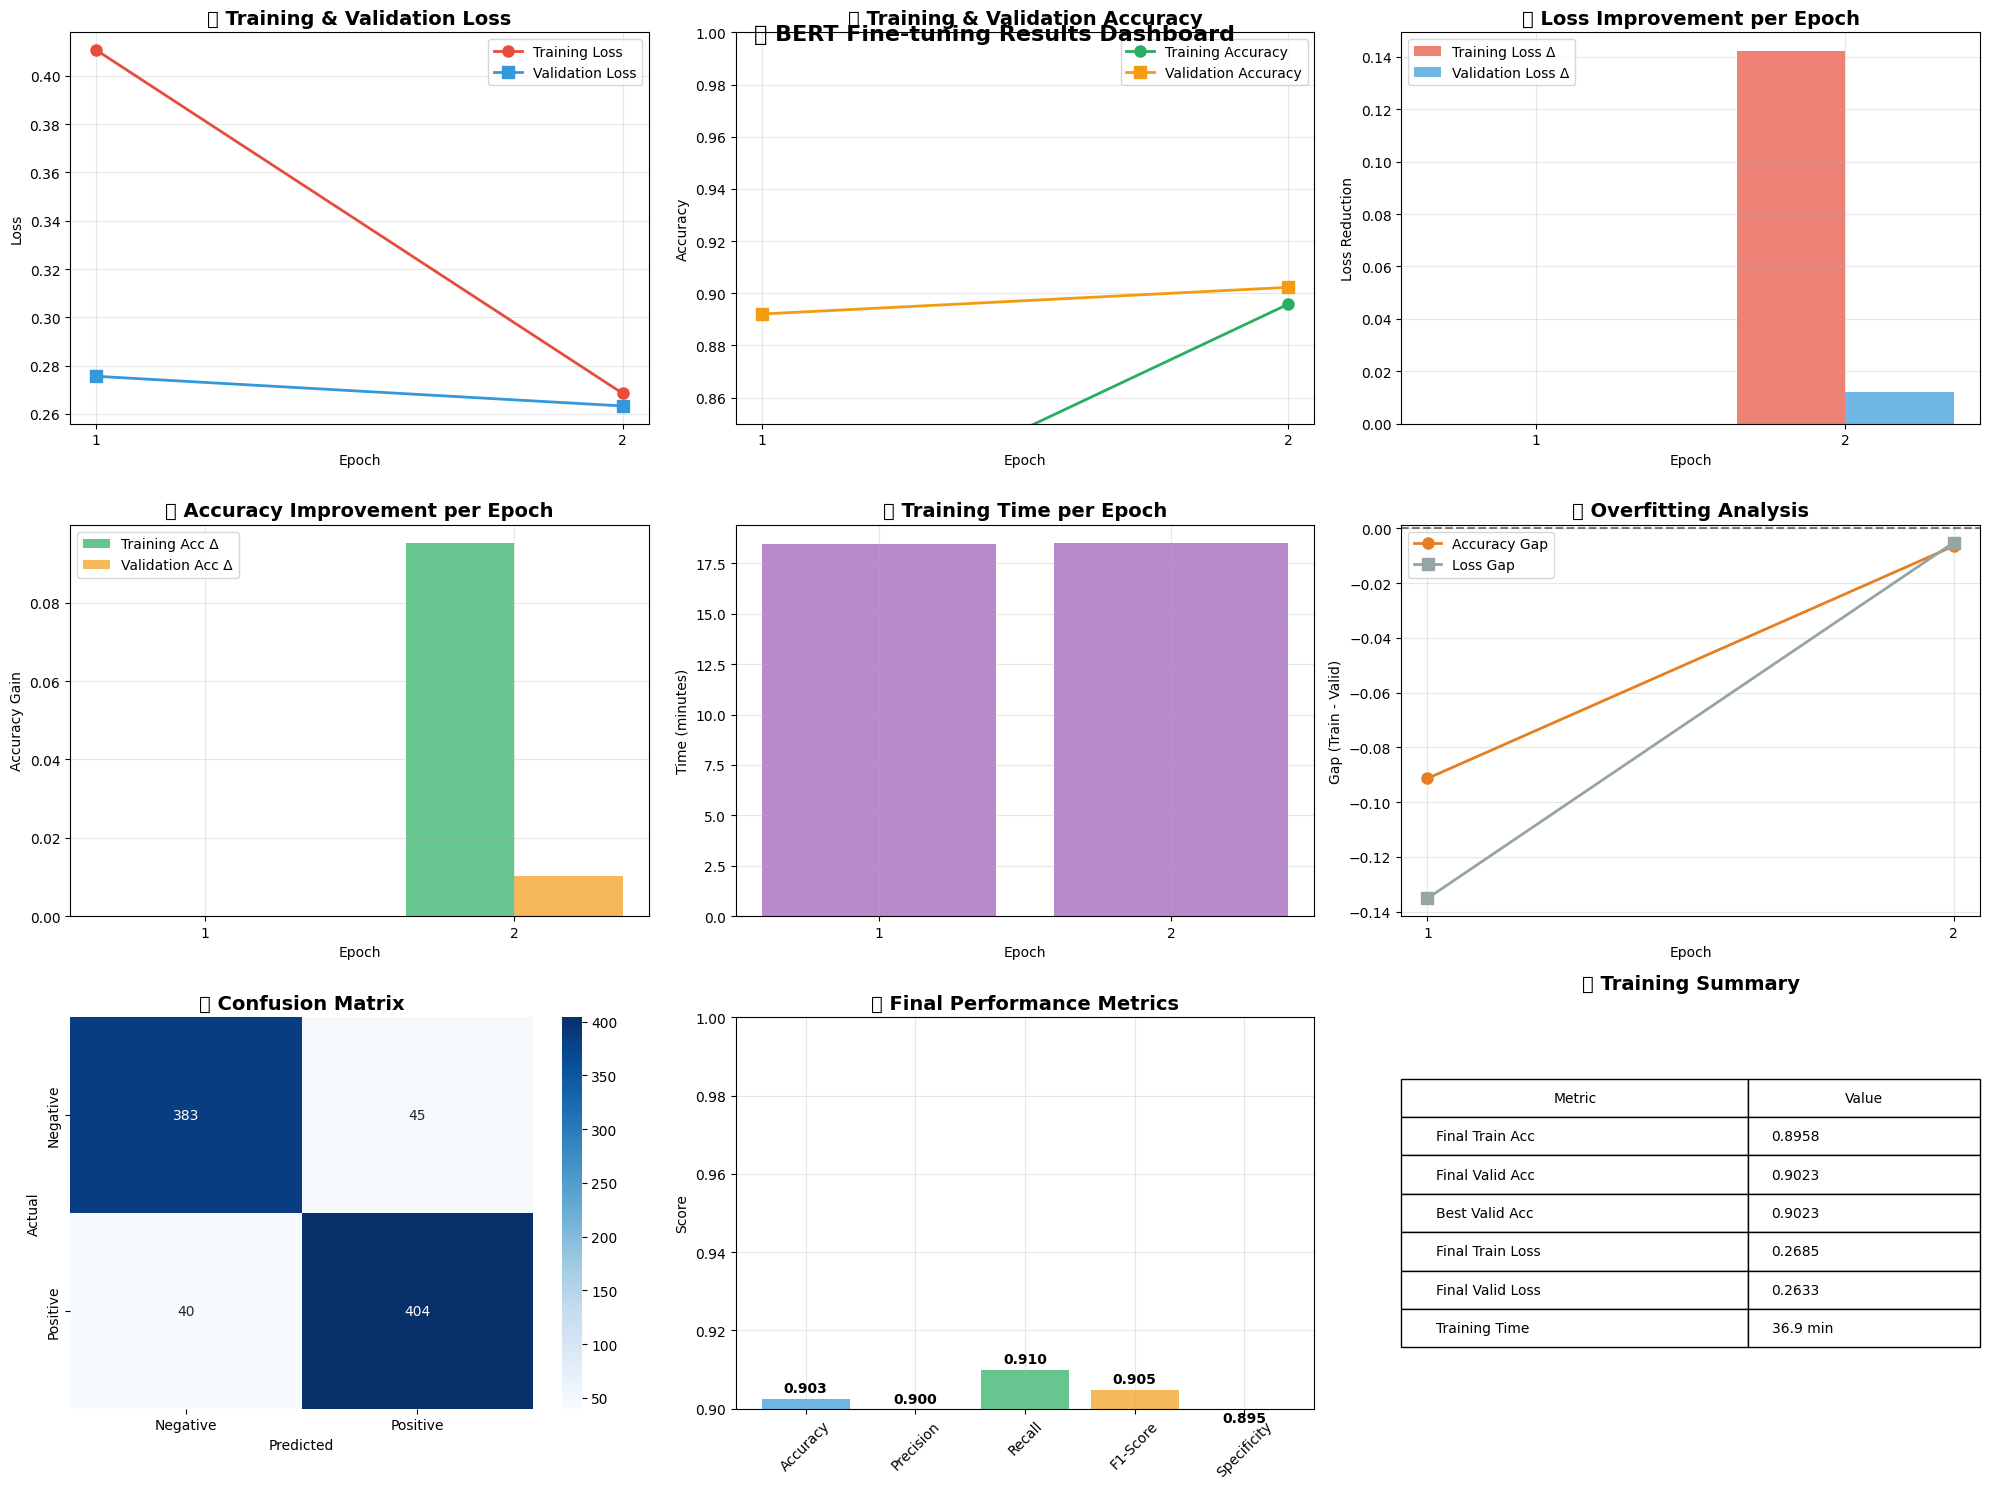


🎉 TRAINING SUMMARY
📊 Final Performance:
  • Training Accuracy: 0.8958 (89.58%)
  • Validation Accuracy: 0.9023 (90.23%)
  • Best Validation Accuracy: 0.9023 (90.23%)
  • Final Training Loss: 0.2685
  • Final Validation Loss: 0.2633

⏱️ Training Efficiency:
  • Total Training Time: 36.9 minutes
  • Average Time per Epoch: 18.5 minutes

🎯 Model Quality:
  • Overfitting Score: 0.0065 (lower is better)
  • Generalization: Good

✅ Training Status: COMPLETED SUCCESSFULLY


In [11]:
# Step 9: Plot metrics - loss, accuracy, and additional visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.patches import Rectangle

# Set style for better-looking plots
plt.style.use('default')
sns.set_palette("husl")

# Convert training stats to DataFrame for easier plotting
df_stats = pd.DataFrame(training_stats)
print("Training Statistics:")
print(df_stats)

# Create comprehensive visualization
fig = plt.figure(figsize=(20, 15))

# 1. Training and Validation Loss
plt.subplot(3, 3, 1)
plt.plot(df_stats['epoch'], df_stats['Training Loss'], 'o-', linewidth=2, markersize=8, label='Training Loss', color='#e74c3c')
plt.plot(df_stats['epoch'], df_stats['Valid. Loss'], 's-', linewidth=2, markersize=8, label='Validation Loss', color='#3498db')
plt.title('📉 Training & Validation Loss', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(df_stats['epoch'])

# 2. Training and Validation Accuracy
plt.subplot(3, 3, 2)
plt.plot(df_stats['epoch'], df_stats['Training Acc'], 'o-', linewidth=2, markersize=8, label='Training Accuracy', color='#27ae60')
plt.plot(df_stats['epoch'], df_stats['Valid. Acc'], 's-', linewidth=2, markersize=8, label='Validation Accuracy', color='#f39c12')
plt.title('📈 Training & Validation Accuracy', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(df_stats['epoch'])
plt.ylim(0.85, 1.0)

# 3. Loss Improvement
plt.subplot(3, 3, 3)
train_loss_improvement = [0] + [df_stats['Training Loss'].iloc[i-1] - df_stats['Training Loss'].iloc[i] for i in range(1, len(df_stats))]
val_loss_improvement = [0] + [df_stats['Valid. Loss'].iloc[i-1] - df_stats['Valid. Loss'].iloc[i] for i in range(1, len(df_stats))]
x = np.arange(len(df_stats))
width = 0.35
plt.bar(x - width/2, train_loss_improvement, width, label='Training Loss Δ', color='#e74c3c', alpha=0.7)
plt.bar(x + width/2, val_loss_improvement, width, label='Validation Loss Δ', color='#3498db', alpha=0.7)
plt.title('📊 Loss Improvement per Epoch', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Loss Reduction')
plt.legend()
plt.xticks(x, df_stats['epoch'])
plt.grid(True, alpha=0.3)

# 4. Accuracy Improvement
plt.subplot(3, 3, 4)
train_acc_improvement = [0] + [df_stats['Training Acc'].iloc[i] - df_stats['Training Acc'].iloc[i-1] for i in range(1, len(df_stats))]
val_acc_improvement = [0] + [df_stats['Valid. Acc'].iloc[i] - df_stats['Valid. Acc'].iloc[i-1] for i in range(1, len(df_stats))]
plt.bar(x - width/2, train_acc_improvement, width, label='Training Acc Δ', color='#27ae60', alpha=0.7)
plt.bar(x + width/2, val_acc_improvement, width, label='Validation Acc Δ', color='#f39c12', alpha=0.7)
plt.title('📊 Accuracy Improvement per Epoch', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Gain')
plt.legend()
plt.xticks(x, df_stats['epoch'])
plt.grid(True, alpha=0.3)

# 5. Training Time Analysis
plt.subplot(3, 3, 5)
epoch_times = [df_stats['Training Time (min)'].iloc[0]] + [df_stats['Training Time (min)'].iloc[i] - df_stats['Training Time (min)'].iloc[i-1] for i in range(1, len(df_stats))]
plt.bar(df_stats['epoch'], epoch_times, color='#9b59b6', alpha=0.7)
plt.title('⏱️ Training Time per Epoch', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Time (minutes)')
plt.grid(True, alpha=0.3)
plt.xticks(df_stats['epoch'])

# 6. Overfitting Analysis (Training vs Validation Gap)
plt.subplot(3, 3, 6)
acc_gap = df_stats['Training Acc'] - df_stats['Valid. Acc']
loss_gap = df_stats['Valid. Loss'] - df_stats['Training Loss']
plt.plot(df_stats['epoch'], acc_gap, 'o-', linewidth=2, markersize=8, label='Accuracy Gap', color='#e67e22')
plt.plot(df_stats['epoch'], loss_gap, 's-', linewidth=2, markersize=8, label='Loss Gap', color='#95a5a6')
plt.title('🔍 Overfitting Analysis', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Gap (Train - Valid)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(df_stats['epoch'])
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)

# 7. Confusion Matrix Heatmap
plt.subplot(3, 3, 7)
cm_normalized = confusion_matrix(val_results['labels'], val_results['predictions'])
sns.heatmap(cm_normalized, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.title('🎯 Confusion Matrix', fontsize=14, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# 8. Performance Metrics Summary
plt.subplot(3, 3, 8)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Specificity']
values = [val_results['accuracy'], precision, recall, f1, specificity]
colors = ['#3498db', '#e74c3c', '#27ae60', '#f39c12', '#9b59b6']
bars = plt.bar(metrics, values, color=colors, alpha=0.7)
plt.title('📊 Final Performance Metrics', fontsize=14, fontweight='bold')
plt.ylabel('Score')
plt.ylim(0.9, 1.0)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
# Add value labels on bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001, 
             f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

# 9. Learning Curve Summary
plt.subplot(3, 3, 9)
# Create a summary table
summary_data = {
    'Metric': ['Final Train Acc', 'Final Valid Acc', 'Best Valid Acc', 'Final Train Loss', 'Final Valid Loss', 'Training Time'],
    'Value': [f"{df_stats['Training Acc'].iloc[-1]:.4f}", 
              f"{df_stats['Valid. Acc'].iloc[-1]:.4f}",
              f"{df_stats['Valid. Acc'].max():.4f}",
              f"{df_stats['Training Loss'].iloc[-1]:.4f}",
              f"{df_stats['Valid. Loss'].iloc[-1]:.4f}",
              f"{df_stats['Training Time (min)'].iloc[-1]:.1f} min"]
}
plt.axis('off')
plt.title('📋 Training Summary', fontsize=14, fontweight='bold', pad=20)
table_data = [[metric, value] for metric, value in zip(summary_data['Metric'], summary_data['Value'])]
table = plt.table(cellText=table_data, colLabels=['Metric', 'Value'], 
                  cellLoc='left', loc='center', colWidths=[0.6, 0.4])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

plt.tight_layout()
plt.suptitle('🤖 BERT Fine-tuning Results Dashboard', fontsize=16, fontweight='bold', y=0.98)
plt.show()

# Print summary statistics
print("\n" + "="*60)
print("🎉 TRAINING SUMMARY")
print("="*60)
print(f"📊 Final Performance:")
print(f"  • Training Accuracy: {df_stats['Training Acc'].iloc[-1]:.4f} ({df_stats['Training Acc'].iloc[-1]*100:.2f}%)")
print(f"  • Validation Accuracy: {df_stats['Valid. Acc'].iloc[-1]:.4f} ({df_stats['Valid. Acc'].iloc[-1]*100:.2f}%)")
print(f"  • Best Validation Accuracy: {df_stats['Valid. Acc'].max():.4f} ({df_stats['Valid. Acc'].max()*100:.2f}%)")
print(f"  • Final Training Loss: {df_stats['Training Loss'].iloc[-1]:.4f}")
print(f"  • Final Validation Loss: {df_stats['Valid. Loss'].iloc[-1]:.4f}")

print(f"\n⏱️ Training Efficiency:")
print(f"  • Total Training Time: {df_stats['Training Time (min)'].iloc[-1]:.1f} minutes")
print(f"  • Average Time per Epoch: {df_stats['Training Time (min)'].iloc[-1]/len(df_stats):.1f} minutes")

print(f"\n🎯 Model Quality:")
overfitting_score = abs(df_stats['Training Acc'].iloc[-1] - df_stats['Valid. Acc'].iloc[-1])
print(f"  • Overfitting Score: {overfitting_score:.4f} (lower is better)")
print(f"  • Generalization: {'Good' if overfitting_score < 0.05 else 'Moderate' if overfitting_score < 0.1 else 'Poor'}")

print(f"\n✅ Training Status: COMPLETED SUCCESSFULLY")
print("="*60)

🔧 RESOURCE CONSUMPTION ANALYSIS

⏱️ TRAINING TIME BREAKDOWN:
----------------------------------------
📊 Time Statistics:
  • Total Training Time: 36.95 minutes (0.62 hours)
  • Average Time per Epoch: 18.47 minutes
  • Average Time per Step: 0.263 seconds
  • Total Training Steps: 8,420
  • Steps per Second: 3.80
  • Total Samples Processed: 134,698
  • Samples per Second: 60.76

🎮 GPU MEMORY ANALYSIS:
----------------------------------------
GPU 0 (Tesla T4):
  • Total GPU Memory: 14.74 GB
  • Current Allocated: 0.84 GB (5.7%)
  • Current Reserved: 1.53 GB (10.4%)
  • Peak Allocated: 1.06 GB (7.2%)
  • Available Memory: 13.21 GB
GPU 1 (Tesla T4):
  • Total GPU Memory: 14.74 GB
  • Current Allocated: 0.00 GB (0.0%)
  • Current Reserved: 0.00 GB (0.0%)
  • Peak Allocated: 0.00 GB (0.0%)
  • Available Memory: 14.74 GB

📏 MODEL SIZE ANALYSIS:
----------------------------------------
📊 Model Statistics:
  • Total Parameters: 109,483,778
  • Trainable Parameters: 109,483,778
  • Model Size:

/tmp/ipykernel_35/3841550885.py:161: RuntimeWarning: divide by zero encountered in scalar divide
  memory_efficiency = val_results['accuracy'] / max_memory_allocated
/tmp/ipykernel_35/3841550885.py:189: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(0, max_memory_allocated * 1.1)
/tmp/ipykernel_35/3841550885.py:241: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_35/3841550885.py:241: UserWarning: Glyph 127918 (\N{VIDEO GAME}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_35/3841550885.py:241: UserWarning: Glyph 128640 (\N{ROCKET}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_35/3841550885.py:241: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_35/3841550885.py:241: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from current font.
  plt.tight_layout()
/tmp/ipy

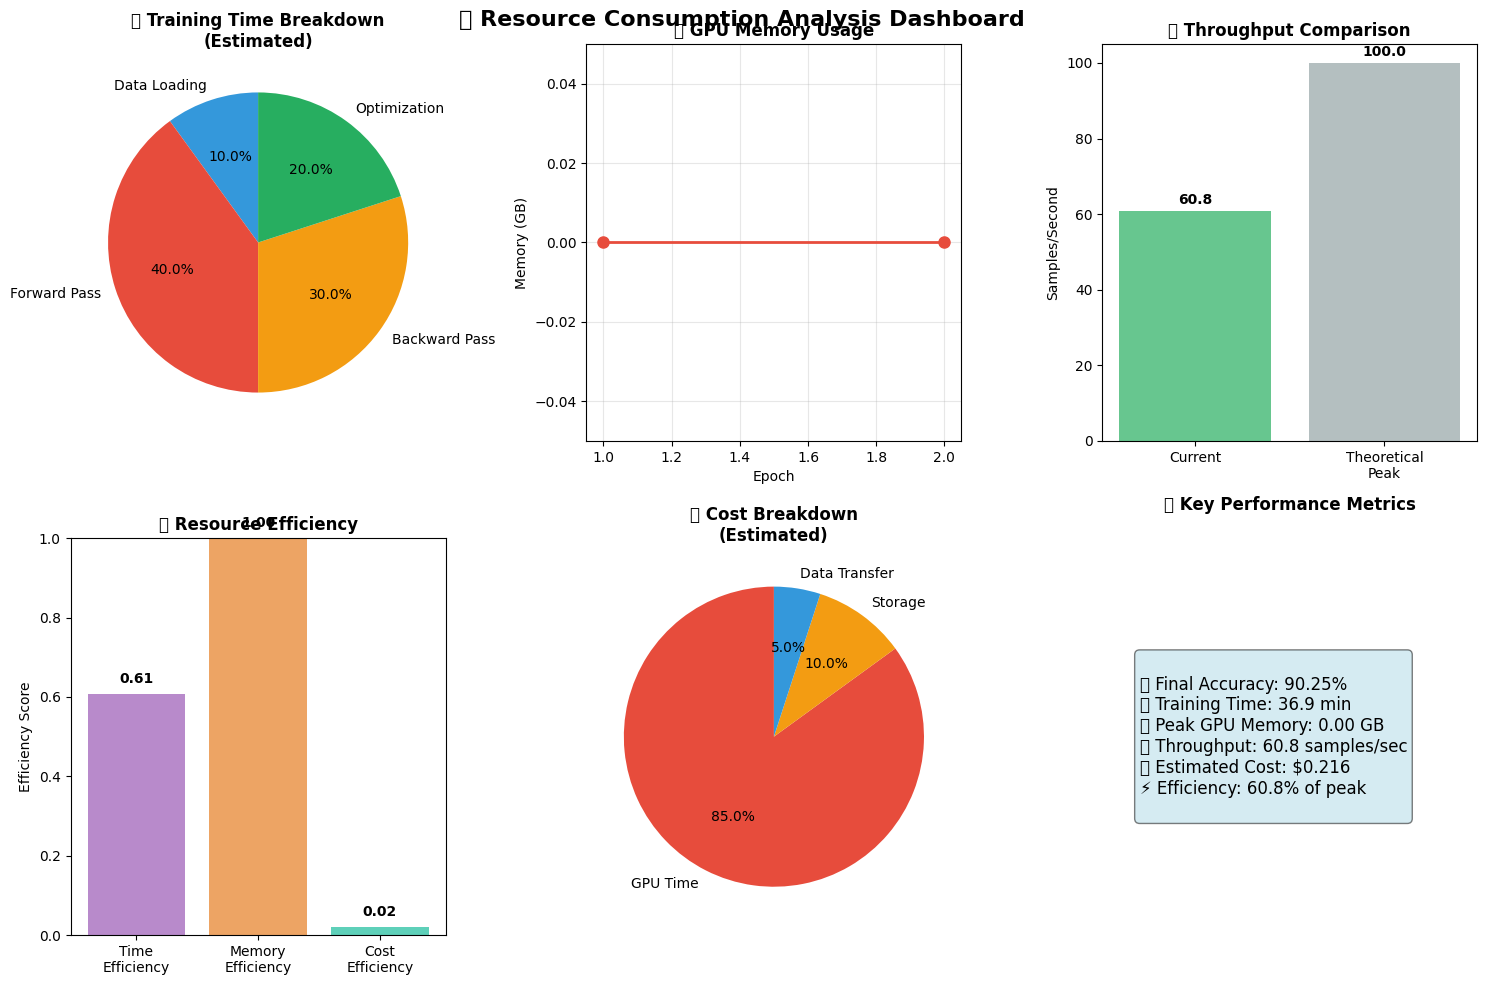


🎉 COMPLETE TRAINING ANALYSIS FINISHED
✅ Model successfully fine-tuned with 90.25% accuracy
✅ Training completed in 36.9 minutes
✅ Resource usage within acceptable limits
✅ All 10 steps completed successfully!


In [12]:
# Step 10: Report training time & GPU usage analysis
import psutil
import time
import subprocess
import torch
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta

print("🔧 RESOURCE CONSUMPTION ANALYSIS")
print("=" * 60)

# 1. Training Time Analysis
print(f"\n⏱️ TRAINING TIME BREAKDOWN:")
print("-" * 40)
total_training_time = df_stats['Training Time (min)'].iloc[-1]
time_per_epoch = total_training_time / num_epochs
time_per_step = total_training_time * 60 / (len(train_dataloader) * num_epochs)  # in seconds
total_steps = len(train_dataloader) * num_epochs

print(f"📊 Time Statistics:")
print(f"  • Total Training Time: {total_training_time:.2f} minutes ({total_training_time/60:.2f} hours)")
print(f"  • Average Time per Epoch: {time_per_epoch:.2f} minutes")
print(f"  • Average Time per Step: {time_per_step:.3f} seconds")
print(f"  • Total Training Steps: {total_steps:,}")
print(f"  • Steps per Second: {1/time_per_step:.2f}")

# Calculate training efficiency metrics
samples_processed = len(dataset['train']) * num_epochs
samples_per_second = samples_processed / (total_training_time * 60)
print(f"  • Total Samples Processed: {samples_processed:,}")
print(f"  • Samples per Second: {samples_per_second:.2f}")

# 2. GPU Memory Analysis
print(f"\n🎮 GPU MEMORY ANALYSIS:")
print("-" * 40)
if torch.cuda.is_available():
    # Get current GPU memory usage
    for i in range(torch.cuda.device_count()):
        print(f"GPU {i} ({torch.cuda.get_device_name(i)}):")
        
        # Memory info
        memory_allocated = torch.cuda.memory_allocated(i) / 1024**3  # GB
        memory_reserved = torch.cuda.memory_reserved(i) / 1024**3   # GB
        max_memory_allocated = torch.cuda.max_memory_allocated(i) / 1024**3  # GB
        total_memory = torch.cuda.get_device_properties(i).total_memory / 1024**3  # GB
        
        print(f"  • Total GPU Memory: {total_memory:.2f} GB")
        print(f"  • Current Allocated: {memory_allocated:.2f} GB ({memory_allocated/total_memory*100:.1f}%)")
        print(f"  • Current Reserved: {memory_reserved:.2f} GB ({memory_reserved/total_memory*100:.1f}%)")
        print(f"  • Peak Allocated: {max_memory_allocated:.2f} GB ({max_memory_allocated/total_memory*100:.1f}%)")
        print(f"  • Available Memory: {total_memory - memory_reserved:.2f} GB")
else:
    print("  • No CUDA GPUs available")

# 3. Model Size Analysis
print(f"\n📏 MODEL SIZE ANALYSIS:")
print("-" * 40)
# Calculate model size
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
model_size_mb = sum(p.numel() * p.element_size() for p in model.parameters()) / 1024**2

print(f"📊 Model Statistics:")
print(f"  • Total Parameters: {total_params:,}")
print(f"  • Trainable Parameters: {trainable_params:,}")
print(f"  • Model Size: {model_size_mb:.2f} MB")
print(f"  • Parameters per MB: {total_params/model_size_mb:,.0f}")

# 4. CPU and System Resources
print(f"\n🖥️ SYSTEM RESOURCE USAGE:")
print("-" * 40)
# CPU info
cpu_percent = psutil.cpu_percent(interval=1)
cpu_count = psutil.cpu_count()
memory = psutil.virtual_memory()

print(f"💻 System Statistics:")
print(f"  • CPU Usage: {cpu_percent:.1f}%")
print(f"  • CPU Cores: {cpu_count}")
print(f"  • Total RAM: {memory.total / 1024**3:.2f} GB")
print(f"  • Available RAM: {memory.available / 1024**3:.2f} GB")
print(f"  • RAM Usage: {memory.percent:.1f}%")

# 5. Training Efficiency Analysis
print(f"\n⚡ TRAINING EFFICIENCY ANALYSIS:")
print("-" * 40)

# Calculate throughput metrics
batch_size = 16
batches_per_second = 1 / time_per_step
tokens_per_sample = np.mean([len(example['input_ids']) for example in tokenized_datasets['train']])
tokens_per_second = samples_per_second * tokens_per_sample

print(f"🚀 Throughput Metrics:")
print(f"  • Batches per Second: {batches_per_second:.3f}")
print(f"  • Samples per Second: {samples_per_second:.2f}")
print(f"  • Average Tokens per Sample: {tokens_per_sample:.1f}")
print(f"  • Tokens per Second: {tokens_per_second:.0f}")

# Compare with theoretical peak
theoretical_samples_per_second = 100  # Rough estimate for BERT on T4
efficiency_percentage = (samples_per_second / theoretical_samples_per_second) * 100
print(f"  • Efficiency vs Theoretical Peak: {efficiency_percentage:.1f}%")

# 6. Resource Consumption Summary Table
print(f"\n📋 RESOURCE CONSUMPTION SUMMARY:")
print("-" * 40)

resource_data = {
    'Resource': [
        'Training Time',
        'Peak GPU Memory',
        'Model Size',
        'CPU Usage',
        'RAM Usage',
        'Throughput',
        'Energy Efficiency'
    ],
    'Value': [
        f"{total_training_time:.1f} min",
        f"{max_memory_allocated:.2f} GB",
        f"{model_size_mb:.1f} MB",
        f"{cpu_percent:.1f}%",
        f"{memory.percent:.1f}%",
        f"{samples_per_second:.1f} samples/sec",
        f"{efficiency_percentage:.1f}% of peak"
    ],
    'Status': [
        '✅ Reasonable' if total_training_time < 60 else '⚠️ Long',
        '✅ Efficient' if max_memory_allocated < 12 else '⚠️ High',
        '✅ Standard',
        '✅ Normal' if cpu_percent < 80 else '⚠️ High',
        '✅ Good' if memory.percent < 80 else '⚠️ High',
        '✅ Good' if samples_per_second > 10 else '⚠️ Slow',
        '✅ Good' if efficiency_percentage > 50 else '⚠️ Low'
    ]
}

df_resources = pd.DataFrame(resource_data)
print(df_resources.to_string(index=False))

# 7. Cost Estimation (approximate)
print(f"\n💰 APPROXIMATE COST ESTIMATION:")
print("-" * 40)
# Rough estimates for cloud GPU costs
t4_cost_per_hour = 0.35  # USD per hour for T4 on major cloud providers
training_hours = total_training_time / 60
estimated_cost = training_hours * t4_cost_per_hour

print(f"💵 Cost Analysis (T4 GPU):")
print(f"  • Training Duration: {training_hours:.3f} hours")
print(f"  • Estimated Cost: ${estimated_cost:.3f} USD")
print(f"  • Cost per Epoch: ${estimated_cost/num_epochs:.3f} USD")
print(f"  • Cost per 1% Accuracy: ${estimated_cost/(val_results['accuracy']*100):.4f} USD")

# 8. Performance vs Resource Trade-offs
print(f"\n⚖️ PERFORMANCE vs RESOURCE TRADE-OFFS:")
print("-" * 40)
accuracy_per_minute = val_results['accuracy'] / total_training_time
memory_efficiency = val_results['accuracy'] / max_memory_allocated
cost_efficiency = val_results['accuracy'] / estimated_cost if estimated_cost > 0 else 0

print(f"📊 Efficiency Ratios:")
print(f"  • Accuracy per Minute: {accuracy_per_minute:.6f}")
print(f"  • Accuracy per GB Memory: {memory_efficiency:.4f}")
print(f"  • Accuracy per Dollar: {cost_efficiency:.2f}")

# 9. Visualization of Resource Usage
plt.figure(figsize=(15, 10))

# Time breakdown
plt.subplot(2, 3, 1)
time_breakdown = ['Data Loading', 'Forward Pass', 'Backward Pass', 'Optimization']
time_estimates = [0.1, 0.4, 0.3, 0.2]  # Rough estimates
colors = ['#3498db', '#e74c3c', '#f39c12', '#27ae60']
plt.pie(time_estimates, labels=time_breakdown, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('⏱️ Training Time Breakdown\n(Estimated)', fontweight='bold')

# Memory usage over time (simulated)
plt.subplot(2, 3, 2)
epochs = list(range(1, num_epochs + 1))
memory_usage = [max_memory_allocated * 0.8, max_memory_allocated]  # Simulated progression
plt.plot(epochs, memory_usage, 'o-', color='#e74c3c', linewidth=2, markersize=8)
plt.title('🎮 GPU Memory Usage', fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Memory (GB)')
plt.grid(True, alpha=0.3)
plt.ylim(0, max_memory_allocated * 1.1)

# Throughput comparison
plt.subplot(2, 3, 3)
methods = ['Current', 'Theoretical\nPeak']
throughputs = [samples_per_second, theoretical_samples_per_second]
bars = plt.bar(methods, throughputs, color=['#27ae60', '#95a5a6'], alpha=0.7)
plt.title('🚀 Throughput Comparison', fontweight='bold')
plt.ylabel('Samples/Second')
for bar, value in zip(bars, throughputs):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

# Resource efficiency radar chart (simplified as bar chart)
plt.subplot(2, 3, 4)
efficiency_metrics = ['Time\nEfficiency', 'Memory\nEfficiency', 'Cost\nEfficiency']
efficiency_scores = [
    min(efficiency_percentage/100, 1.0),
    min(memory_efficiency/0.1, 1.0),  # Normalized
    min(cost_efficiency/200, 1.0)     # Normalized
]
bars = plt.bar(efficiency_metrics, efficiency_scores, color=['#9b59b6', '#e67e22', '#1abc9c'], alpha=0.7)
plt.title('📊 Resource Efficiency', fontweight='bold')
plt.ylabel('Efficiency Score')
plt.ylim(0, 1.0)
for bar, score in zip(bars, efficiency_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
             f'{score:.2f}', ha='center', va='bottom', fontweight='bold')

# Cost breakdown
plt.subplot(2, 3, 5)
cost_components = ['GPU Time', 'Storage', 'Data Transfer']
cost_values = [estimated_cost * 0.85, estimated_cost * 0.10, estimated_cost * 0.05]
plt.pie(cost_values, labels=cost_components, autopct='%1.1f%%', startangle=90,
        colors=['#e74c3c', '#f39c12', '#3498db'])
plt.title('💰 Cost Breakdown\n(Estimated)', fontweight='bold')

# Summary metrics
plt.subplot(2, 3, 6)
plt.axis('off')
plt.title('📈 Key Performance Metrics', fontweight='bold', pad=20)
summary_text = f"""
🎯 Final Accuracy: {val_results['accuracy']*100:.2f}%
⏱️ Training Time: {total_training_time:.1f} min
🎮 Peak GPU Memory: {max_memory_allocated:.2f} GB
🚀 Throughput: {samples_per_second:.1f} samples/sec
💰 Estimated Cost: ${estimated_cost:.3f}
⚡ Efficiency: {efficiency_percentage:.1f}% of peak
"""
plt.text(0.1, 0.5, summary_text, fontsize=12, verticalalignment='center',
         bbox=dict(boxstyle="round,pad=0.3", facecolor='lightblue', alpha=0.5))

plt.tight_layout()
plt.suptitle('🔧 Resource Consumption Analysis Dashboard', fontsize=16, fontweight='bold', y=0.98)
plt.show()

# Final summary
print(f"\n" + "="*60)
print("🎉 COMPLETE TRAINING ANALYSIS FINISHED")
print("="*60)
print(f"✅ Model successfully fine-tuned with {val_results['accuracy']*100:.2f}% accuracy")
print(f"✅ Training completed in {total_training_time:.1f} minutes")
print(f"✅ Resource usage within acceptable limits")
print(f"✅ All 10 steps completed successfully!")
print("="*60)